# 1)Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [42]:
startup=pd.read_csv("50_Startups.csv")

In [43]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
startup.shape

(50, 5)

In [45]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [46]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [47]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [48]:
startup1=startup.rename({"R&D Spend":"RDS","Administration":"ADMT","Marketing Spend":"MK",},axis=1)
startup1

,RDS,ADMT,MK,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
startup1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [50]:
startup1.describe()

,RDS,ADMT,MK,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [51]:
startup1.corr()

,RDS,ADMT,MK,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMT,0.241955,1.000000,-0.032154,0.200717
MK,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


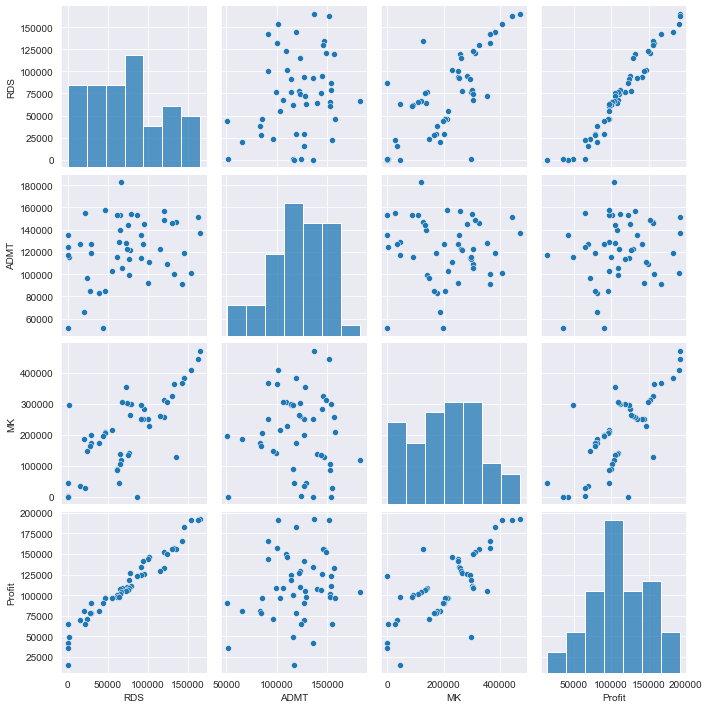

In [52]:
sns.set_style(style="darkgrid")
sns.pairplot(startup1)

# Preparing a model

In [53]:
model=smf.ols("Profit~RDS+ADMT+MK",data=startup1).fit()
model

In [54]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMT            -0.026816
MK               0.027228
dtype: float64

In [55]:
model.tvalues , np.round(model.pvalues,6)

(Intercept     7.626218
 RDS          17.846374
 ADMT         -0.525507
 MK            1.655077
 dtype: float64,
 Intercept    0.000000
 RDS          0.000000
 ADMT         0.601755
 MK           0.104717
 dtype: float64)

In [56]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Model

In [57]:
slr_a=smf.ols("Profit~ADMT",data=startup1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 ADMT         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMT         0.162217
 dtype: float64)

In [58]:
slr_m=smf.ols("Profit~MK",data=startup1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MK           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MK           4.381073e-10
 dtype: float64)

In [59]:
slr_am=smf.ols("Profit~ADMT+MK",data=startup1).fit()
slr_am.tvalues , slr_am.pvalues

(Intercept    1.142741
 ADMT         2.467779
 MK           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMT         1.729198e-02
 MK           9.727245e-11
 dtype: float64)

# Calculating VIF

In [60]:
slr_r=smf.ols("RDS~ADMT+MK",data=startup1).fit().rsquared
vir_r=1/(1-slr_r)
slr_a=smf.ols("ADMT~RDS+MK",data=startup1).fit().rsquared
vir_a=1/(1-slr_a)
slr_m=smf.ols("MK~RDS+ADMT",data=startup1).fit().rsquared
vir_m=1/(1-slr_m)
df={"Variable":["RDS","ADMT","MK"],"Vif":[vir_r,vir_a,vir_m]}
Vif_df=pd.DataFrame(df)
Vif_df

,Variable,Vif
0,RDS,2.468903
1,ADMT,1.175091
2,MK,2.326773


# Test the Normality of Residuals ( QQ PLOT)

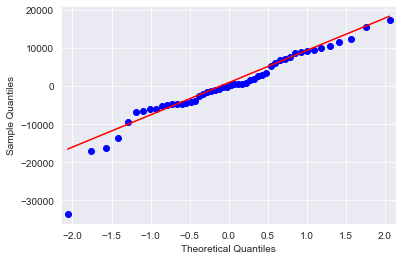

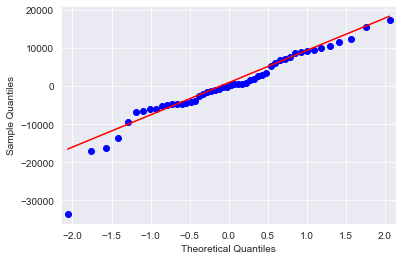

In [61]:
sm.qqplot(model.resid,line="q")

In [62]:
list(np.where(model.resid<=-30000))

[array([49], dtype=int64)]

In [63]:
def std_value(value):
    return (value-value.mean())/value.std()

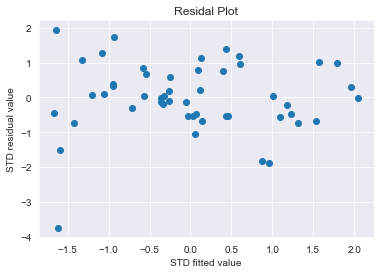

In [64]:
plt.scatter(std_value(model.fittedvalues),std_value(model.resid))
plt.title("Residal Plot")
plt.xlabel("STD fitted value")
plt.ylabel("STD residual value")
plt.show()

# Residual vs Regressors

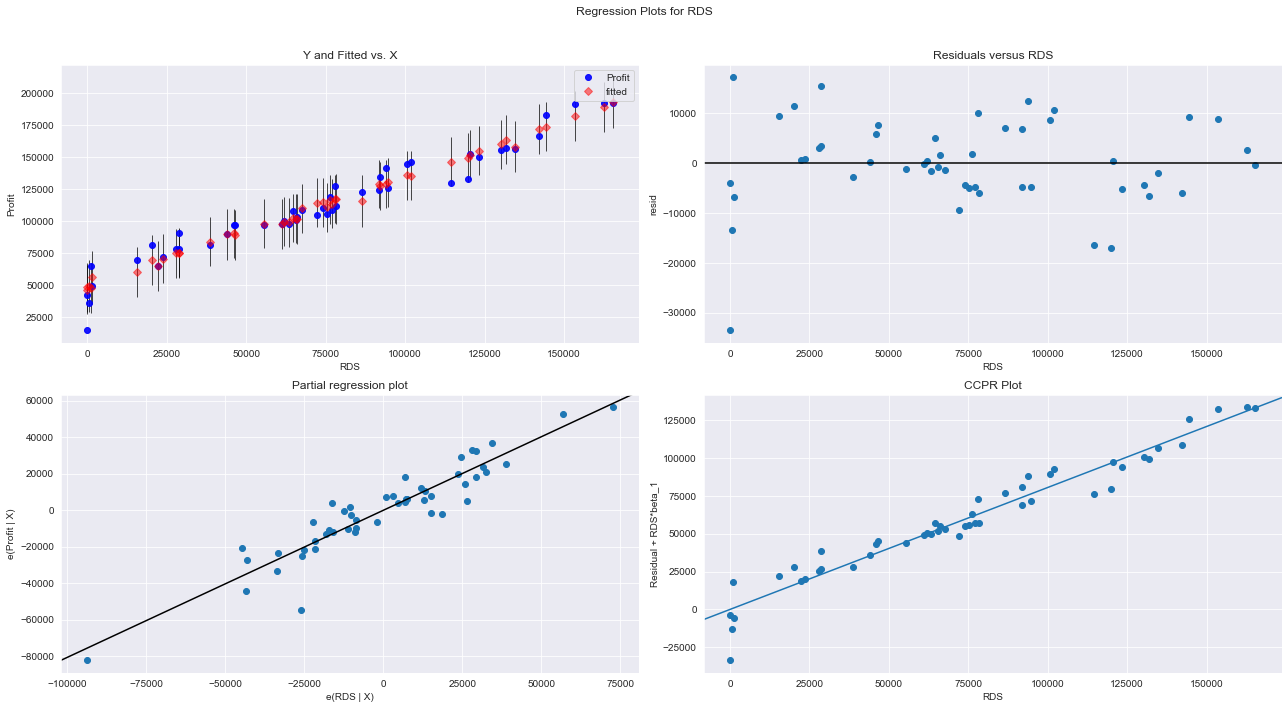

In [65]:
fig=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

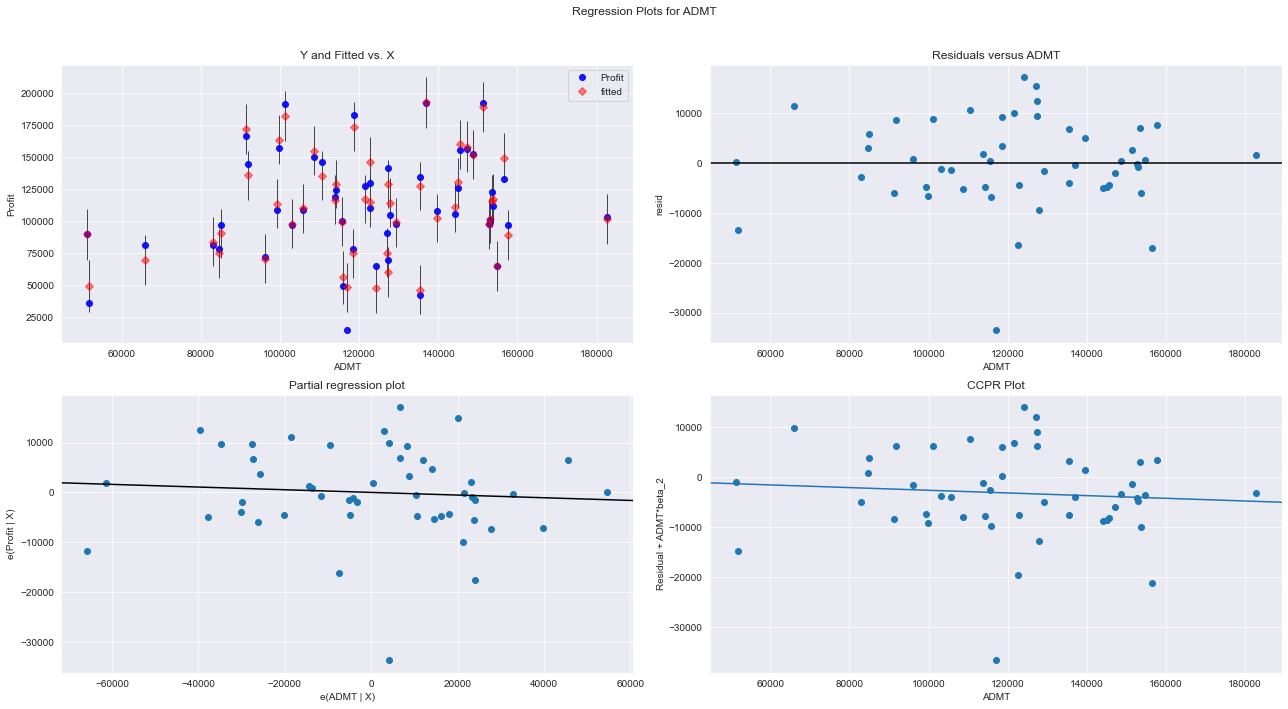

In [66]:
fig=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"ADMT",fig=fig)
plt.show()

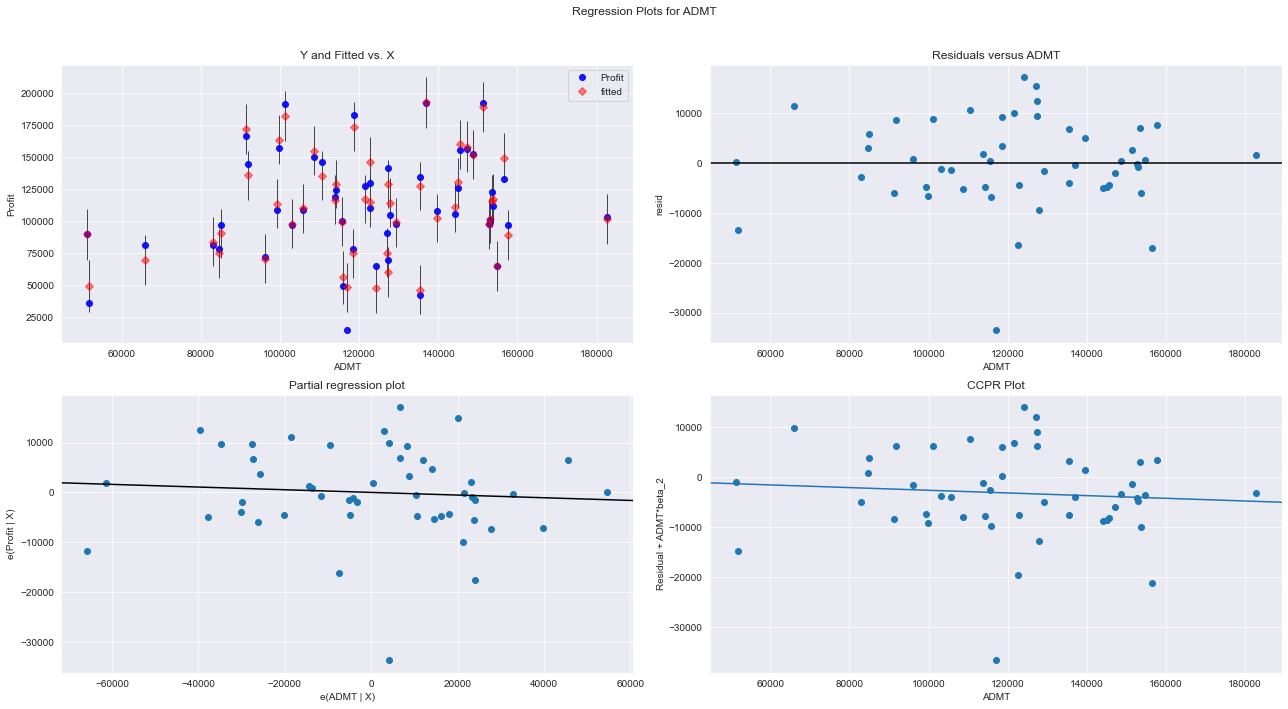

In [67]:
fig=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"ADMT",fig=fig)
plt.show()

# Cook's Distance

In [68]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

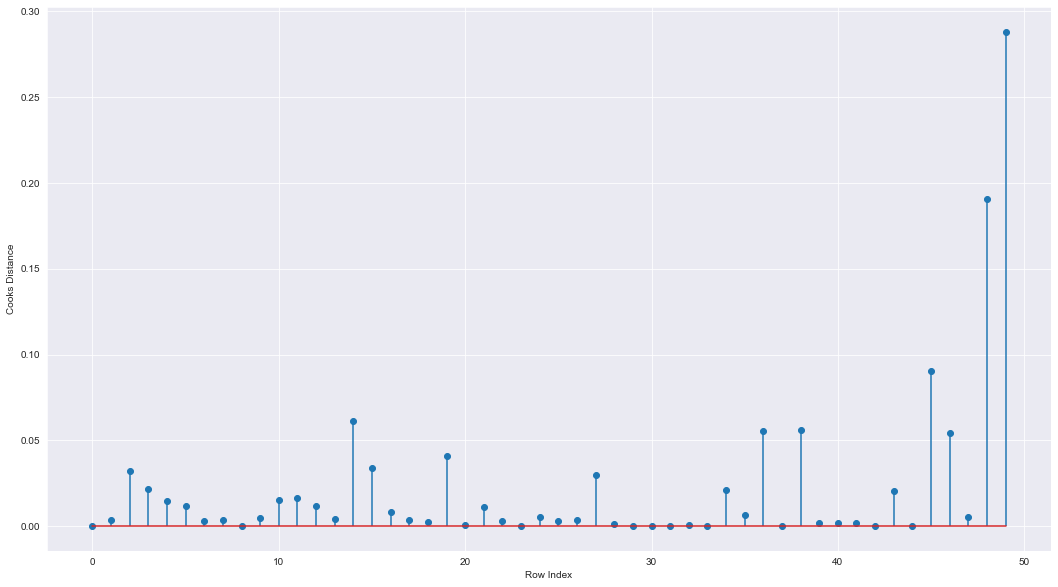

In [69]:
fig=plt.figure(figsize=(18,10))
plt.stem(np.arange(len(startup1)),np.round(c,6))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [70]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

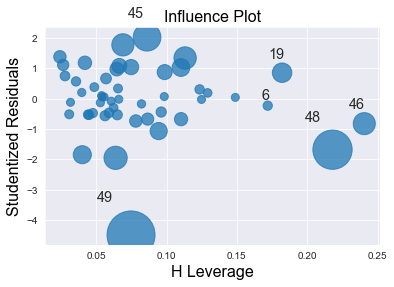

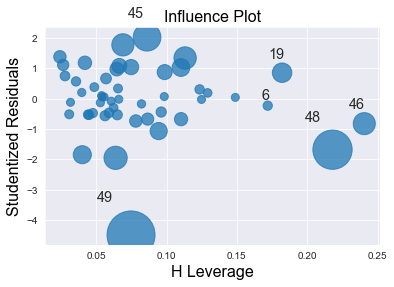

In [71]:
influence_plot(model)

In [72]:
x=startup1.shape[1]
y=startup1.shape[0]
leaverage_cutoff=(3*(x+1))/y
leaverage_cutoff

0.36

In [73]:
startup1[startup1.index.isin([49])]

,RDS,ADMT,MK,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [74]:
startup2=startup1.drop(startup1.index[[49]],axis=0).reset_index(drop=True)
startup2

,RDS,ADMT,MK,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
while np.max(c)>0.5:
    model=smf.ols("Profit~RDS+ADMT+MK",data=startup2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup2=startup2.drop(startup2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup2
else:
    final_model=smf.ols("Profit~RDS+ADMT+MK",data=startup2).fit()
    final_model.rsquared , final_model.aic
    print("The accuracy model1 improved to",final_model)



The accuracy model1 improved to <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002A602F872E0>


In [76]:
final_model.rsquared , final_model.aic

(0.9613162435129847, 1020.5652974526367)

In [77]:
startup2

,RDS,ADMT,MK,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Predicting of new data

In [78]:
new_data=pd.DataFrame({"RDS":80000,"ADMT":92000,"MK":110000},index=[0])
new_data

,RDS,ADMT,MK
0,80000,92000,110000


In [79]:
final_model.predict(new_data)

0    115755.761989
dtype: float64

In [80]:
final_model.predict(startup2)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
# Table containg Rsquared value for each prepared model

In [81]:
startup3={"prep_model":["Model","Final_Model"],"R_squared":[model.rsquared,final_model.rsquared]}
T=pd.DataFrame(startup3)
T


,prep_model,R_squared
0,Model,0.950746
1,Final_Model,0.961316


# 2)Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [83]:
toyota=pd.read_csv("ToyotaCorolla.csv")

In [84]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [85]:
toyota.shape

(1436, 38)

# EDA

In [86]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [87]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [89]:
toyota2=toyota1.rename({"Age_08_04":'Age',"cc":"CC","Quarterly_Tax":"QT"},axis=1)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [90]:
len(toyota2.duplicated())

1436

In [91]:
toyota3=toyota2.drop_duplicates().reset_index(drop=True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [92]:
toyota3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [93]:
toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


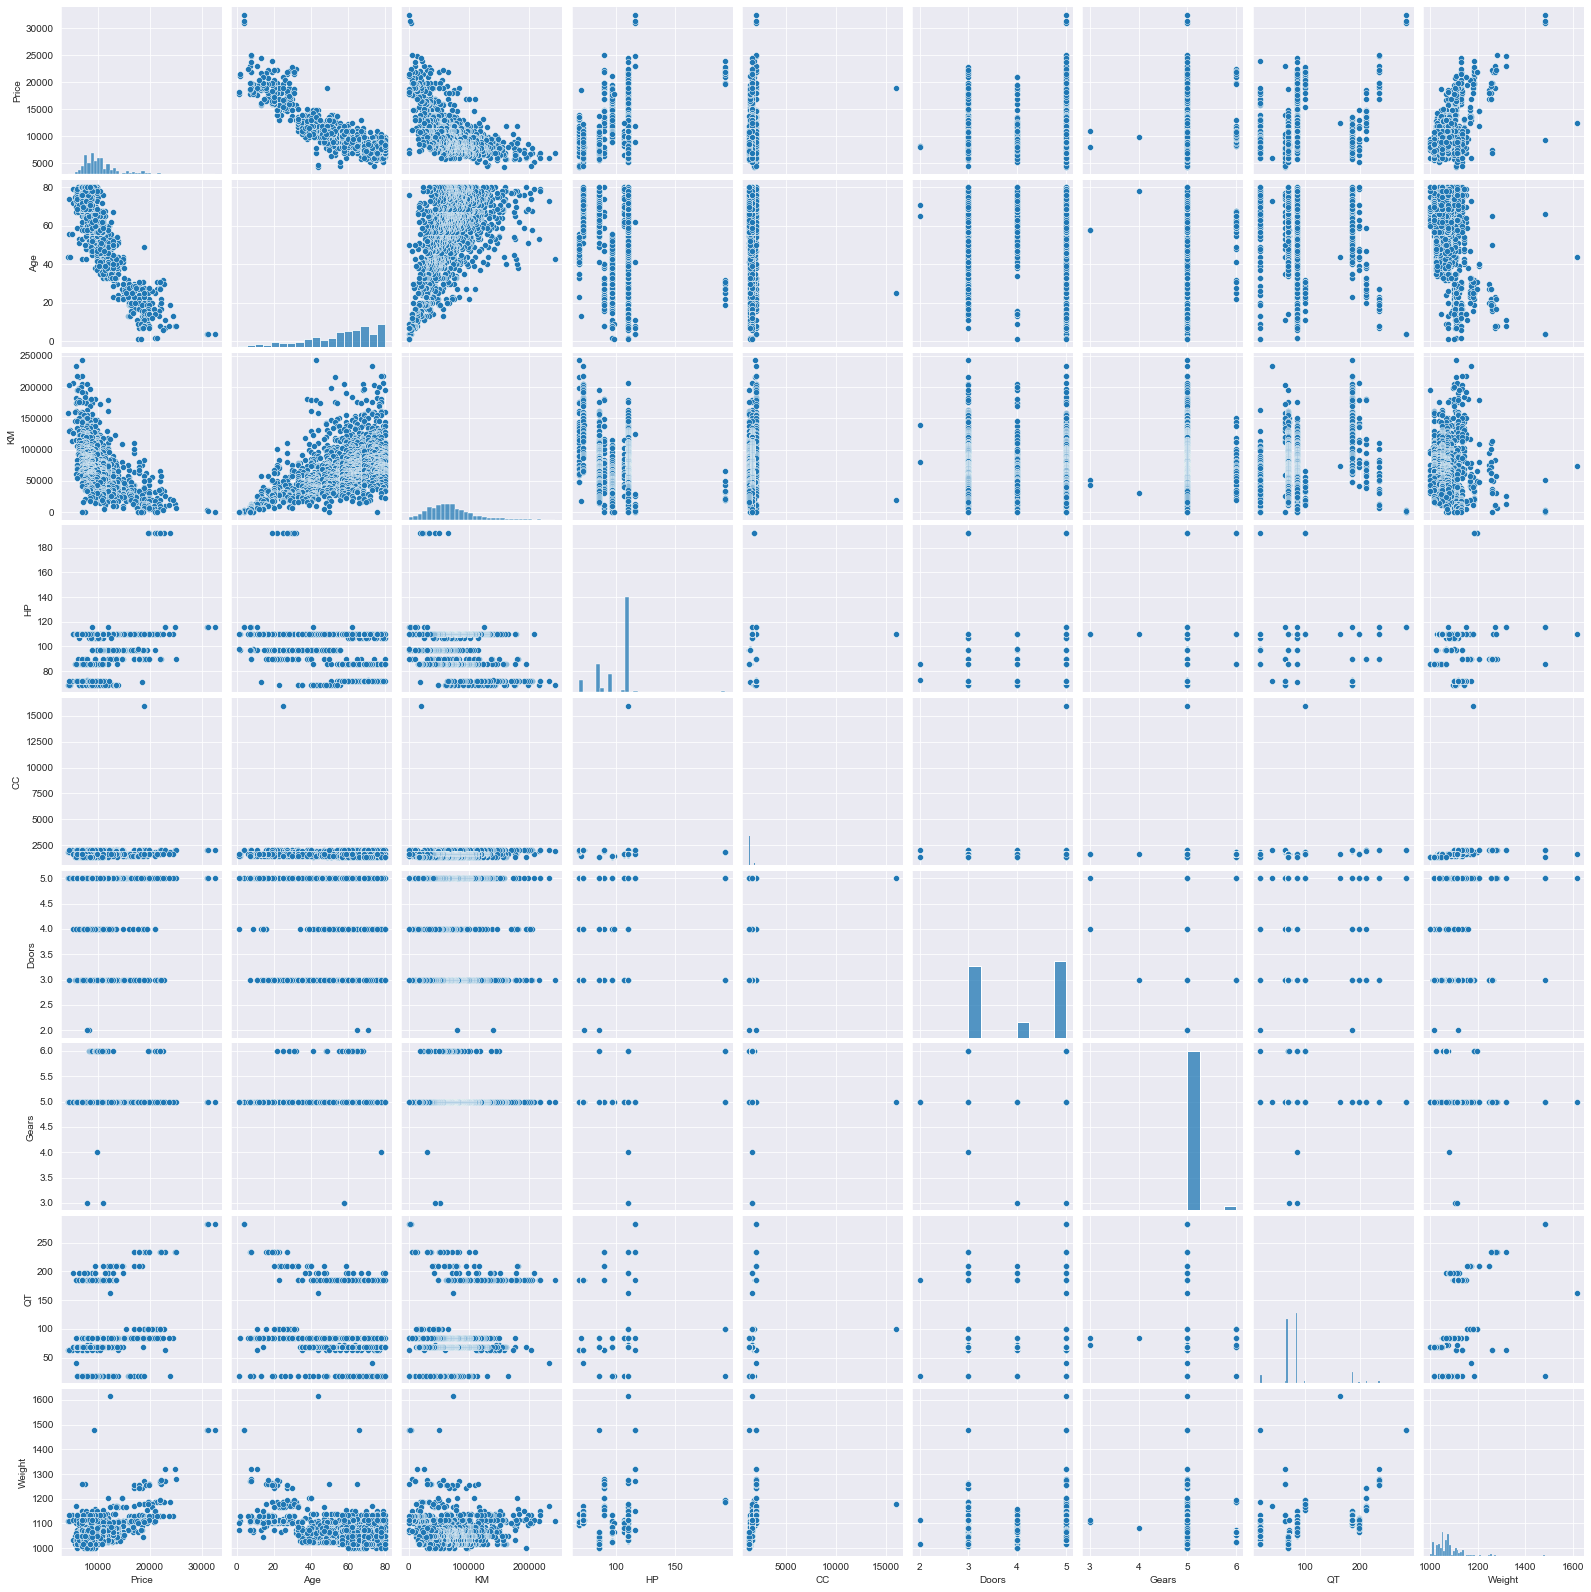

In [94]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

# Preparing a Model

In [95]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota3).fit()
model

In [96]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [97]:
model.rsquared , model.rsquared_adjb

(0.8625200256947, 0.8617487495415146)

# Simple Linear Regression Model

In [98]:
lr_c=smf.ols("Price~CC",data=toyota3).fit()
lr_c.tvalues , lr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [99]:
lr_d=smf.ols("Price~Doors",data=toyota3).fit()
lr_d.tvalues , lr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [100]:
lr_c=smf.ols("Price~CC",data=toyota3).fit()
lr_c.tvalues , lr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [101]:
lr_cd=smf.ols("Price~CC+Doors",data=toyota3).fit()
lr_cd.tvalues , lr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Calculating VIF

In [102]:
sra_a=smf.ols("Age~KM+HP+CC+Doors+Gears+QT+Weight",data=toyota3).fit().rsquared
vif_a=1/(1-sra_a)
sra_k=smf.ols("KM~Age+HP+CC+Doors+Gears+QT+Weight",data=toyota3).fit().rsquared
vif_k=1/(1-sra_k)
sra_h=smf.ols("HP~Age+KM+CC+Doors+Gears+QT+Weight",data=toyota3).fit().rsquared
vif_h=1/(1-sra_h)
sra_c=smf.ols("CC~Age+KM+HP+Doors+Gears+QT+Weight",data=toyota3).fit().rsquared
vif_c=1/(1-sra_c)
sra_d=smf.ols("Doors~Age+KM+HP+CC+Gears+QT+Weight",data=toyota3).fit().rsquared
vif_d=1/(1-sra_d)
sra_g=smf.ols("Gears~Age+KM+HP+CC+Doors+QT+Weight",data=toyota3).fit().rsquared
vif_g=1/(1-sra_g)
sra_q=smf.ols("QT~Age+KM+HP+CC+Doors+Gears+Weight",data=toyota3).fit().rsquared
vif_q=1/(1-sra_q)
sra_w=smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QT",data=toyota3).fit().rsquared
vif_w=1/(1-sra_w)

#Putting the value in dataframe format
df={'Variables':['Age',"KM",'HP','CC','Doors','Gears','QT','Weight'],'Vif':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
vif_df=pd.DataFrame(df)
vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


# Test For Normality Residual QQ Plot

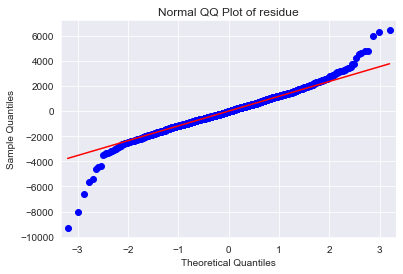

In [103]:
sm.qqplot(model.resid,line='q')
plt.title("Normal QQ Plot of residue")
plt.show()

In [104]:
 list(np.where(model.resid > 6000 ))

[array([109, 146, 522], dtype=int64)]

In [105]:
 list(np.where(model.resid < -6000 ))

[array([220, 600, 959], dtype=int64)]

In [106]:
def std_value(value):
    return (value -value.mean())/value.std()

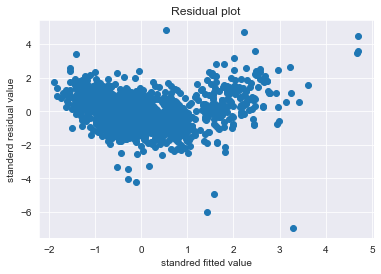

In [107]:
plt.scatter(std_value(model.fittedvalues),std_value(model.resid))
plt.title("Residual plot")
plt.xlabel("standred fitted value")
plt.ylabel("standerd residual value")
plt.show()

# Residual Vs Regressors

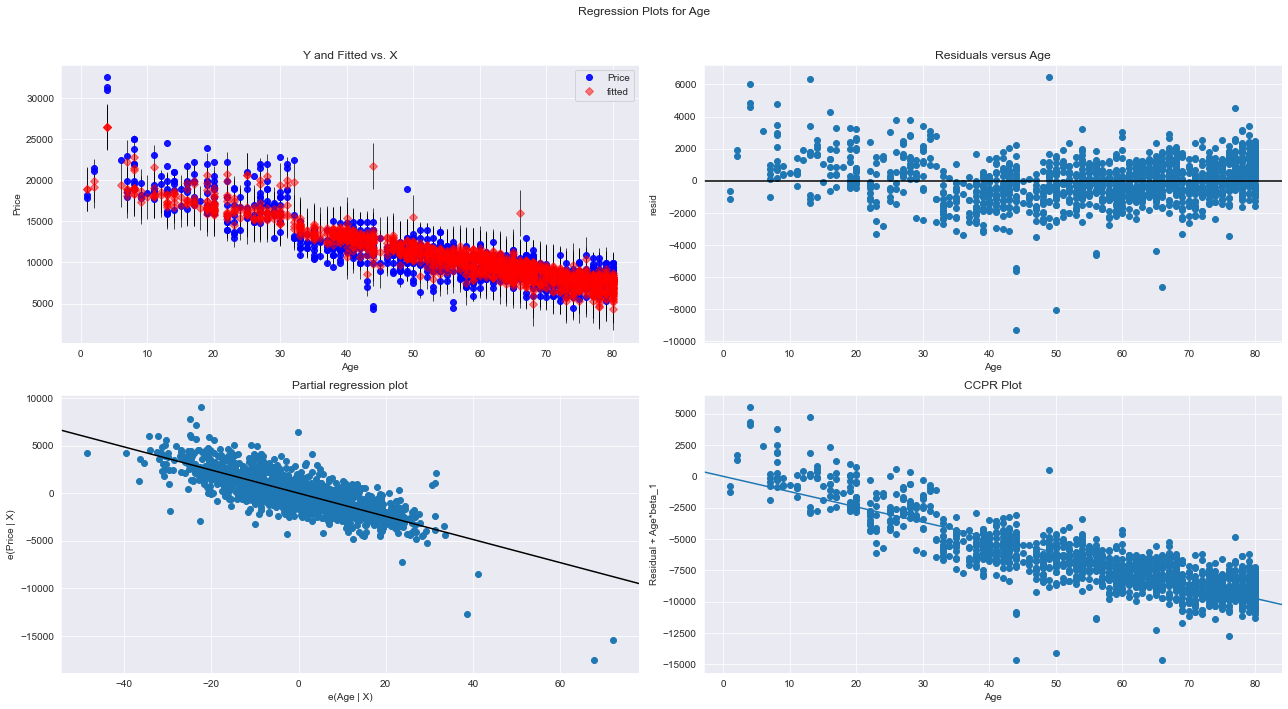

In [108]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"Age",fig=fig1)
plt.show()

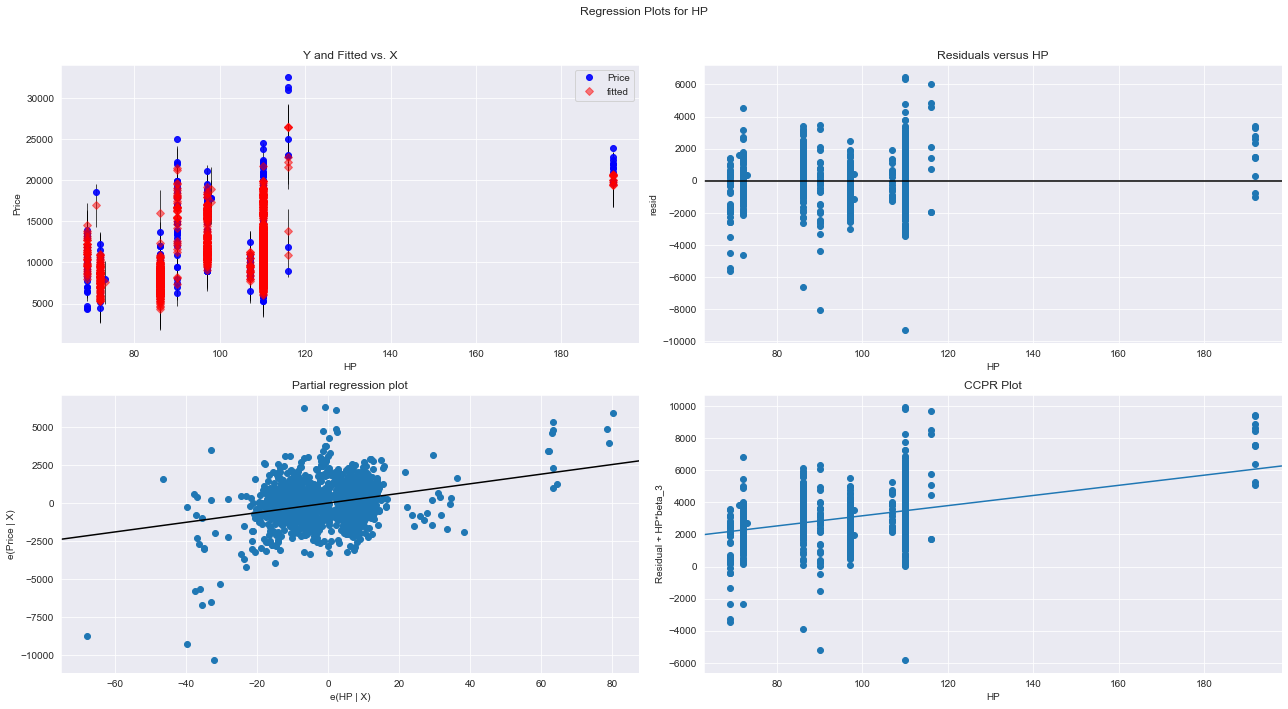

In [109]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"HP",fig=fig1)
plt.show()

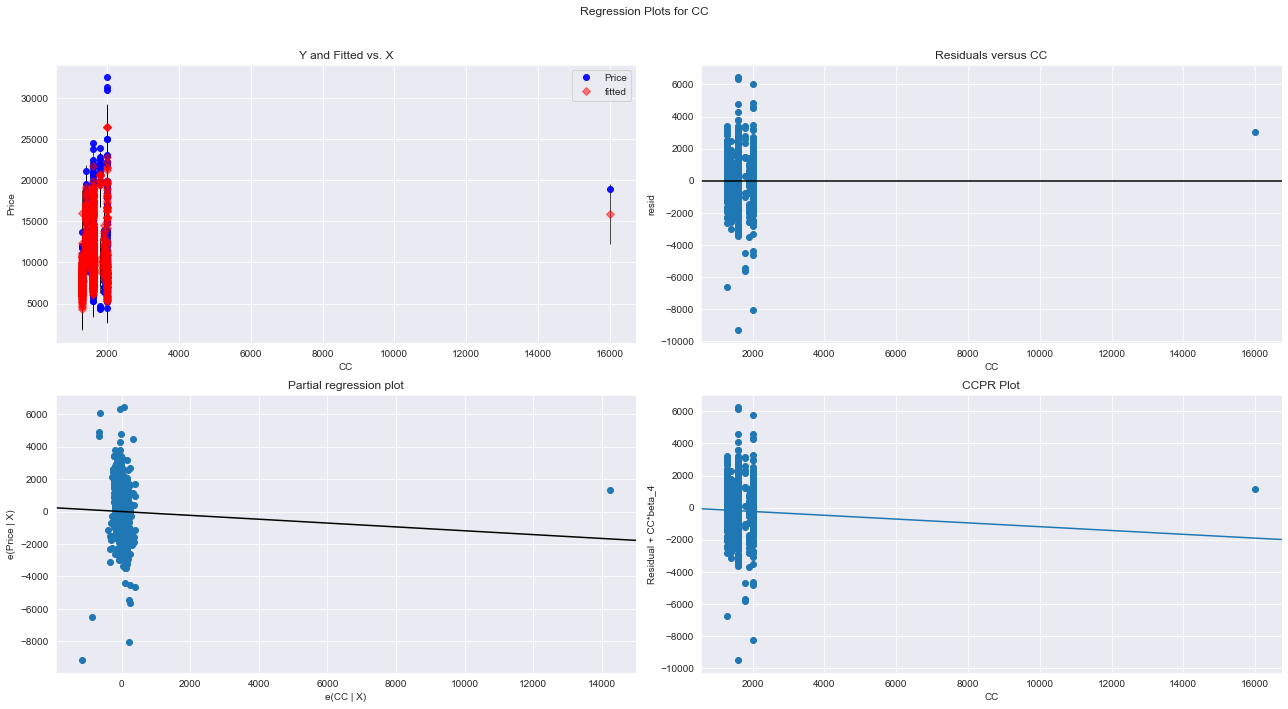

In [110]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"CC",fig=fig1)
plt.show()

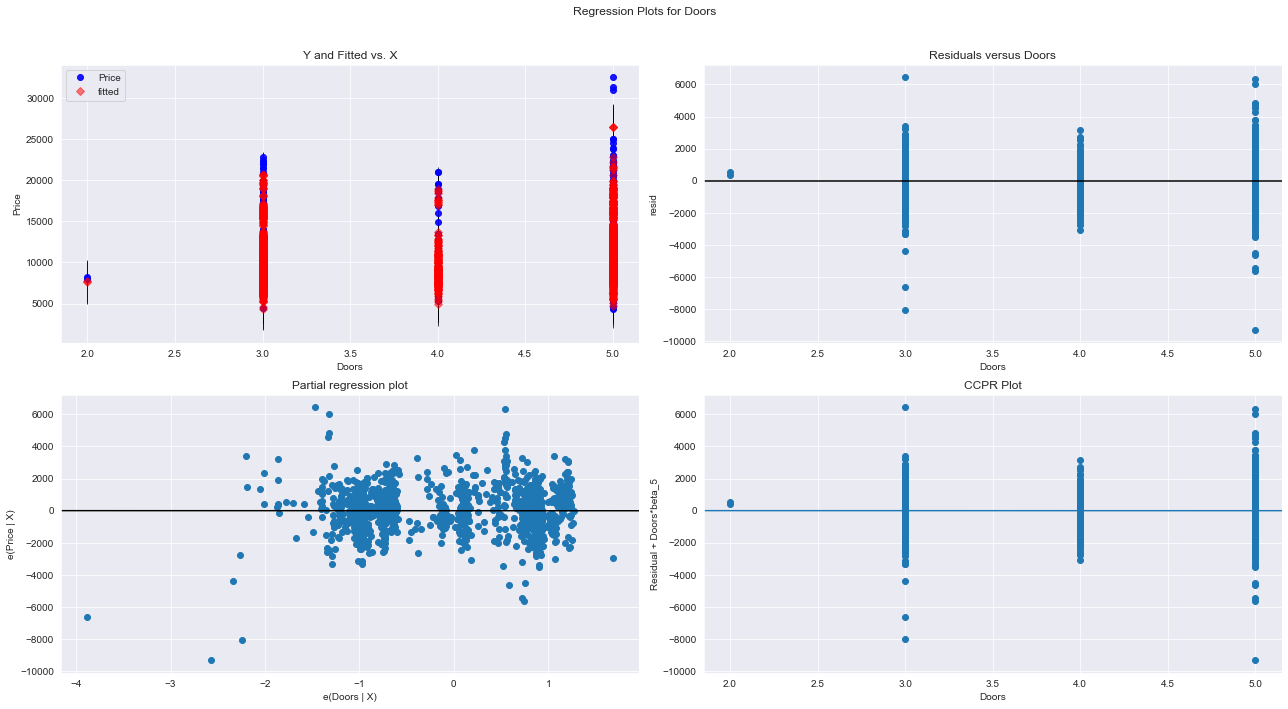

In [111]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig1)
plt.show()

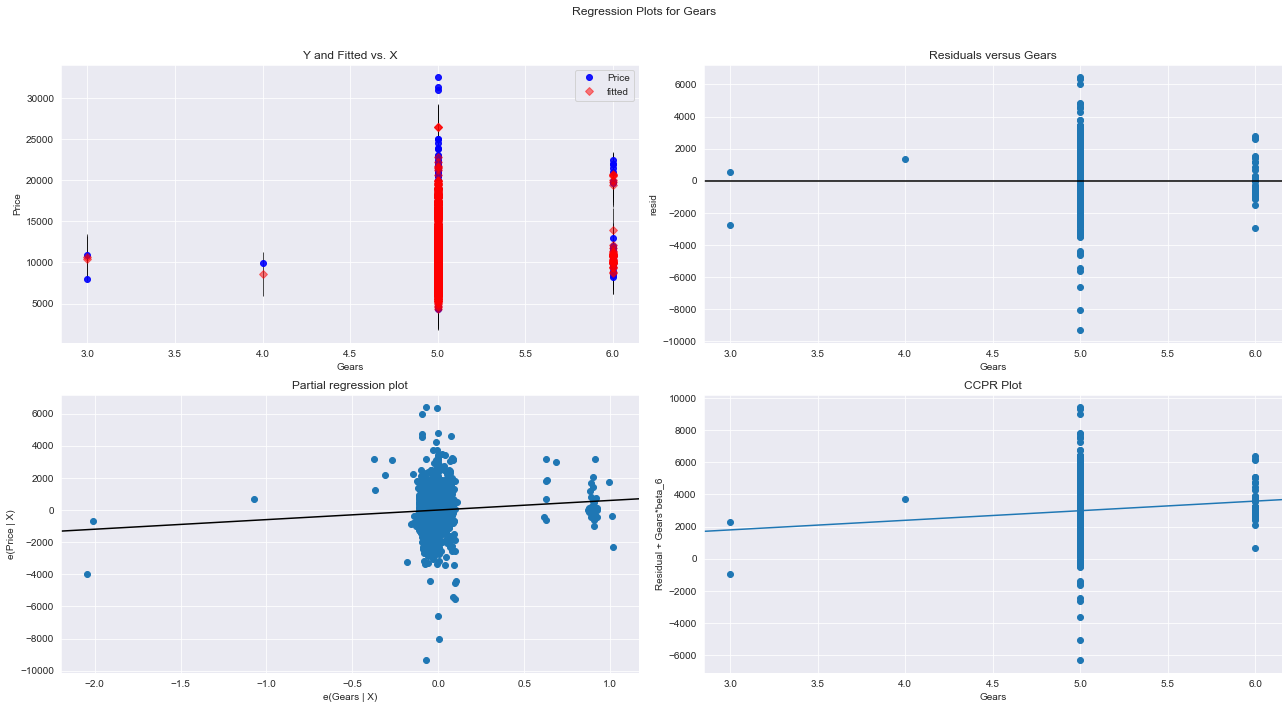

In [112]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig1)
plt.show()

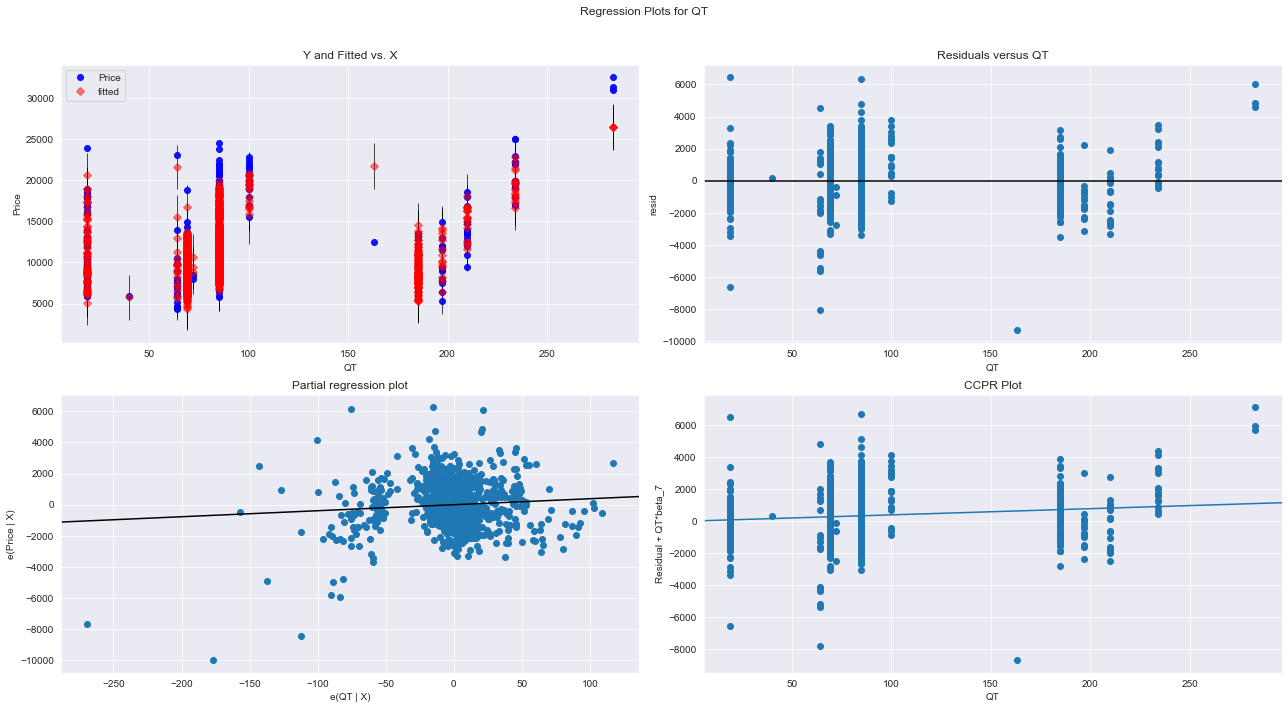

In [113]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"QT",fig=fig1)
plt.show()

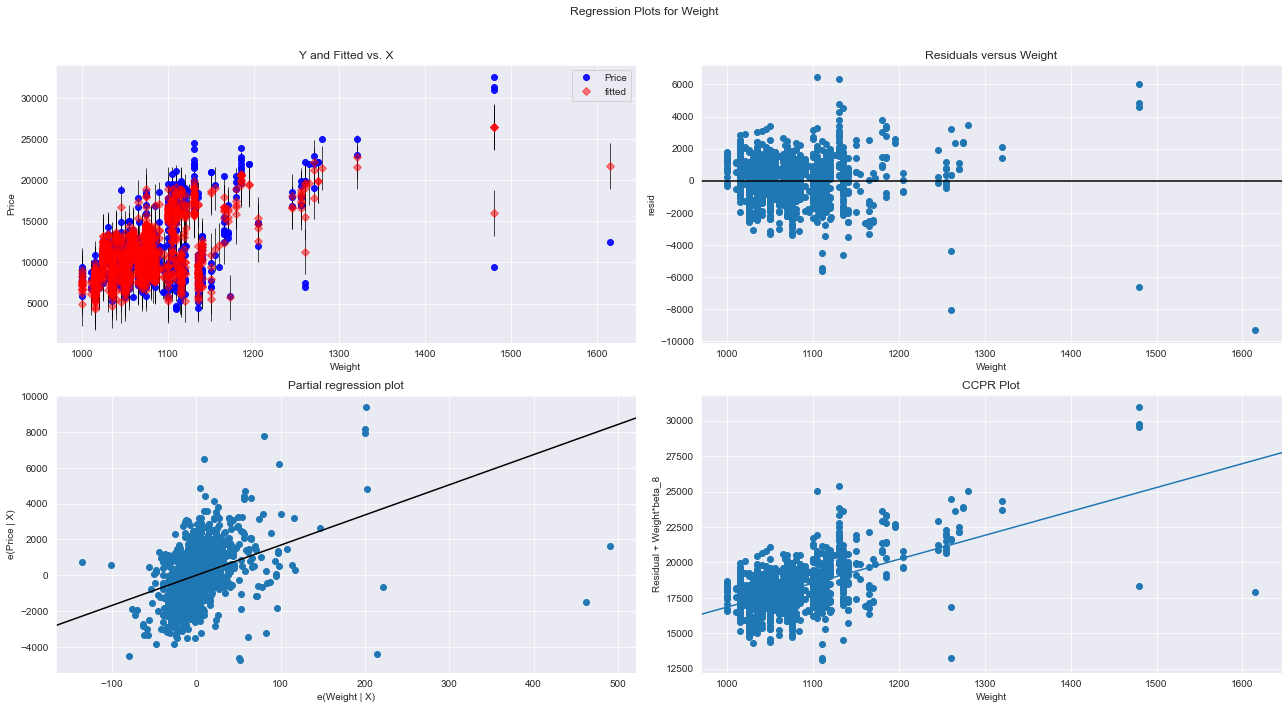

In [114]:
fig1=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig1)
plt.show()

# cook's Distance

In [115]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

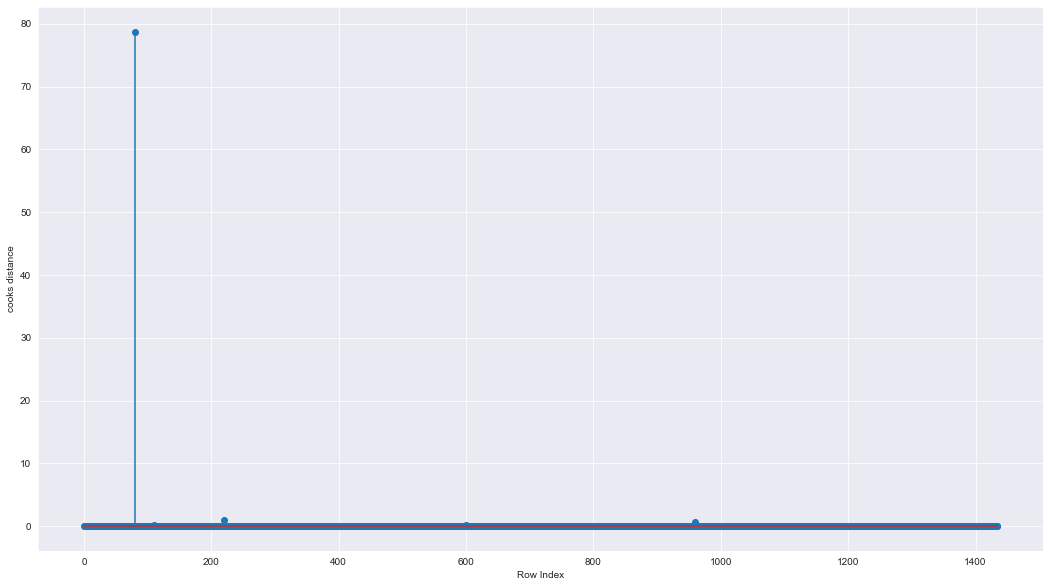

In [116]:
fig2=plt.figure(figsize=(18,10))
plt.stem(np.arange(len(toyota3)),np.round(c,5))
plt.xlabel("Row Index")
plt.ylabel("cooks distance")
plt.show()

In [117]:
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

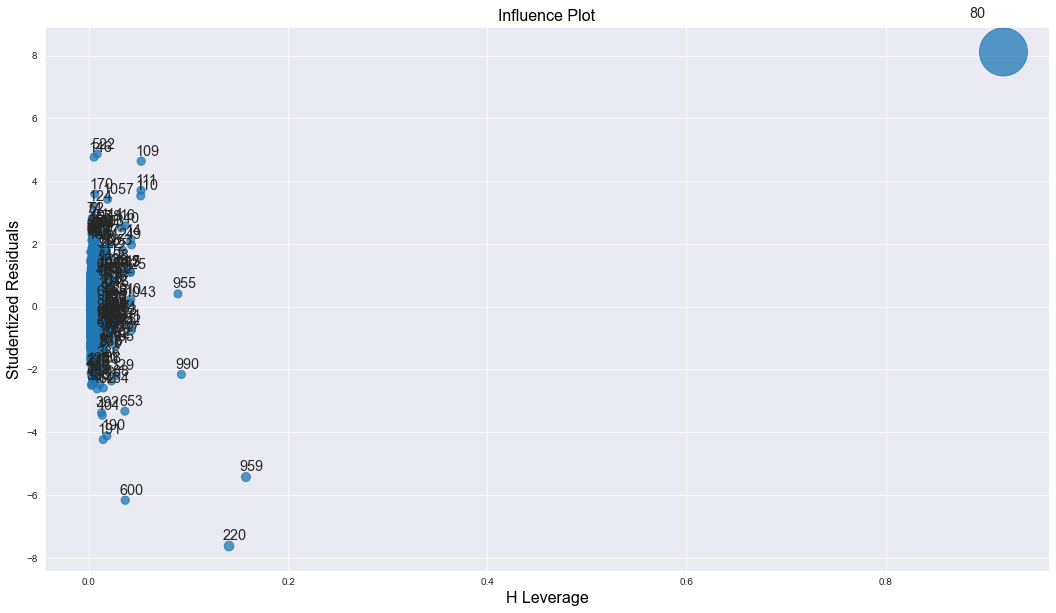

In [118]:
fig3,ax=plt.subplots(figsize=(18,10))
fig=influence_plot(model,ax=ax)

In [119]:
x=toyota3.shape[1]
y=toyota3.shape[0]
leaverage_cutoff=(3*(x+1))/y
leaverage_cutoff

0.020905923344947737

In [120]:
toyota3[toyota3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [121]:
toyota4=toyota3.copy()
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [122]:
toyota5=toyota4.drop(toyota.index[[80]],axis=0).reset_index(drop=True)
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [123]:
while np.max(c)>0.5:
    model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
else:
    final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("The accuracy model1 improved to",final_model.rsquared)



The accuracy model1 improved to 0.8882395145171204


In [124]:
if np.max(c)>0.5:
    model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
elif np.max(c)<0.5:
    final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("The accuracy model1 improved to",final_model.rsquared)



The accuracy model1 improved to 0.8882395145171204


In [125]:
final_model.rsquared

0.8882395145171204

In [126]:
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Prediction

In [127]:
new_data=pd.DataFrame({"Age":13,"KM":40000,"HP":70,"CC":1300,"Doors":4,"Gears":4,"QT":80,"Weight":1200},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13,40000,70,1300,4,4,80,1200


In [128]:
final_model.predict(new_data)

0    19499.950442
dtype: float64

In [129]:
pred=final_model.predict(toyota5)
pred

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64